In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-dataset/Fraud.csv


In [2]:
# Nacessary libraries: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [3]:
rs = RobustScaler()

In [4]:
df = pd.read_csv("/kaggle/input/fraud-dataset/Fraud.csv")
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3205214,249,PAYMENT,1057.92,C701160591,29864.0,28806.08,M1880015618,0.00,0.00,0,0
3954403,288,PAYMENT,4634.79,C1964740996,0.0,0.00,M1160747916,0.00,0.00,0,0
574664,25,CASH_OUT,182668.11,C1306375989,0.0,0.00,C1729548294,1688177.74,1870845.85,0,0
908326,43,PAYMENT,10469.24,C9389839,138.0,0.00,M2051421454,0.00,0.00,0,0
601139,34,CASH_OUT,348166.51,C588220250,0.0,0.00,C739024068,2365774.54,2713941.05,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.min()

step                        1
type                  CASH_IN
amount                    0.0
nameOrig          C1000000639
oldbalanceOrg             0.0
newbalanceOrig            0.0
nameDest          C1000004082
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
dtype: object

In [8]:
df.max()

step                       743
type                  TRANSFER
amount             92445516.64
nameOrig            C999999784
oldbalanceOrg      59585040.37
newbalanceOrig     49585040.37
nameDest            M999999784
oldbalanceDest    356015889.35
newbalanceDest    356179278.92
isFraud                      1
isFlaggedFraud               1
dtype: object

In [9]:
df_copy = df.copy()

# Basic visualization with data

### About the data
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.isnull().sum()   # Checking for missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [13]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

## Missing values indication

In [15]:
# It is clear that there is no missing value in the data.
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Outlier detection

In [16]:
# amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest	
# Only these columns are numerical that include transaction details and accrue some amount.
# Only these columns can be affected by the outliers and disturb the data pattern.

In [17]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

<Axes: >

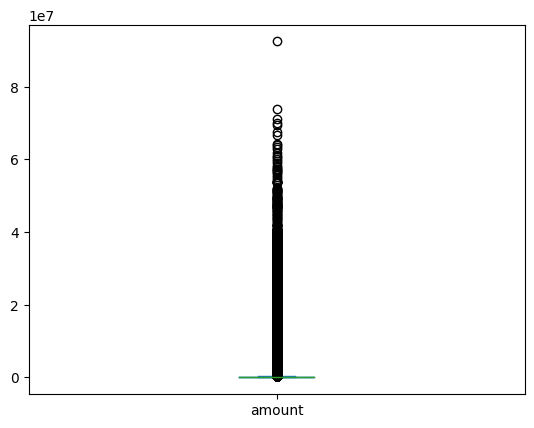

In [18]:
df['amount'].plot(kind = 'box')
# We can see that there is a lot of outliers in the data. And the balance of the `amount` column is not equal.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount', ylabel='Density'>

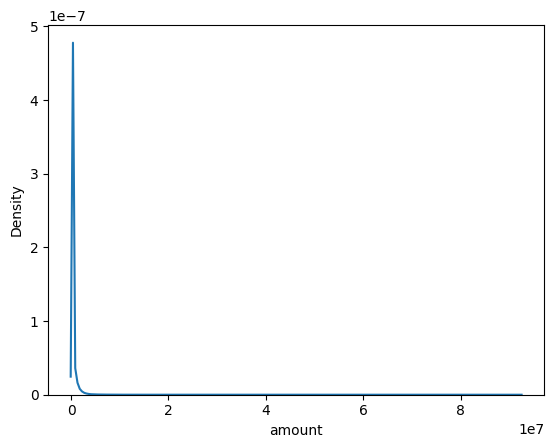

In [19]:
sns.kdeplot(df['amount'])

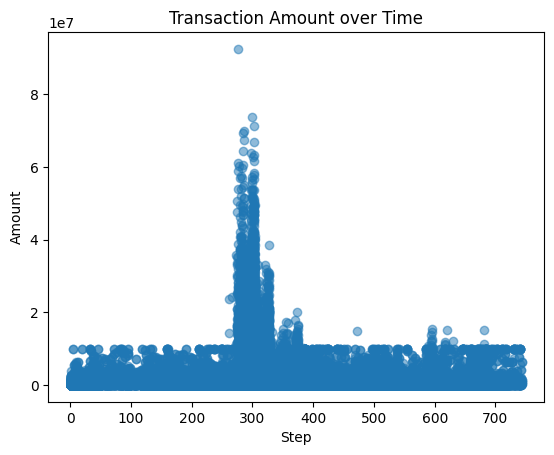

In [20]:
plt.scatter(df['step'], df['amount'], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Transaction Amount over Time')
plt.show()


In [21]:
# Method to remove outliers from the `amount` column
# Scaling is the best approach for handling outliers because it reduces the scale of the data without removing any data.
# In our case, for a fraud detection model, data is very important for analysis, even a single row. 
# So we need to avoid deleting any kind of row.
df['amount_scaled'] = rs.fit_transform(df[['amount']])

In [22]:
# oldbalanceOrg column
df['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

<Axes: >

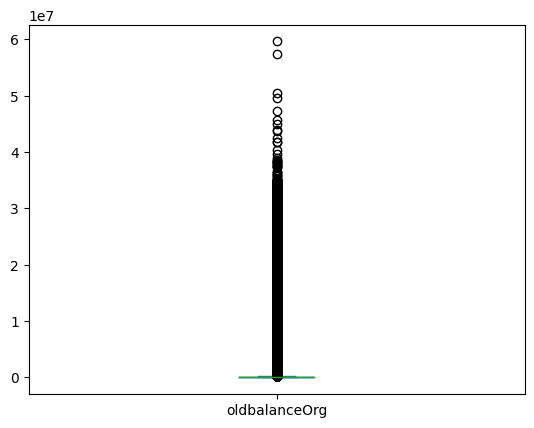

In [23]:
df['oldbalanceOrg'].plot(kind='box')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oldbalanceOrg', ylabel='Density'>

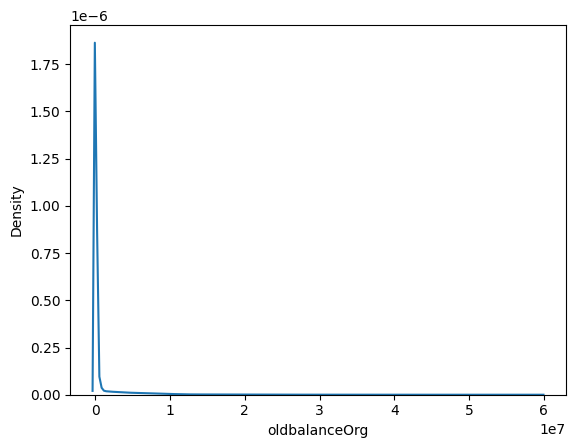

In [24]:
sns.kdeplot(df['oldbalanceOrg'])

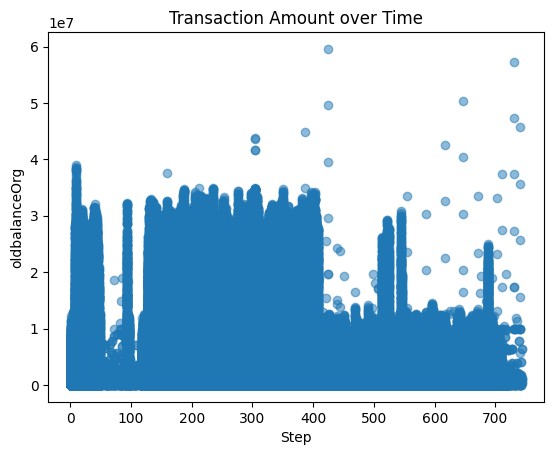

In [25]:
plt.scatter(df['step'], df['oldbalanceOrg'], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('oldbalanceOrg')
plt.title('Transaction Amount over Time')
plt.show()


In [26]:
df['scaled_oldbalanceOrg'] = rs.fit_transform(df[['oldbalanceOrg']])

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_scaled,scaled_oldbalanceOrg
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-0.332932,1.452991
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-0.373762,0.065610
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-0.382380,-0.130708
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-0.382380,-0.130708
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-0.323571,0.254820


In [28]:
df['newbalanceOrig'].describe()

count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

<Axes: >

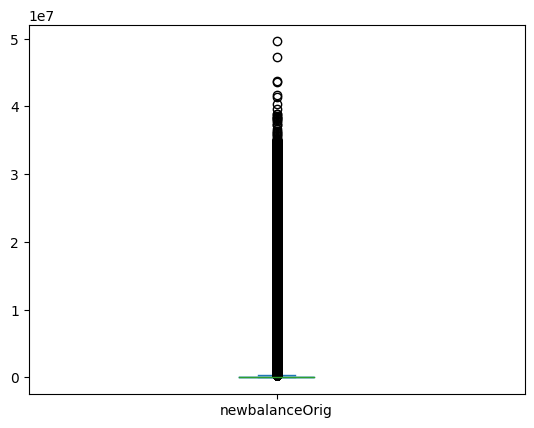

In [29]:
df['newbalanceOrig'].plot(kind='box')

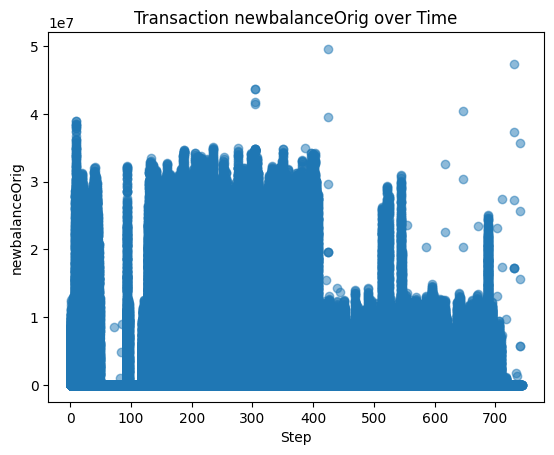

In [30]:
plt.scatter(df['step'], df['newbalanceOrig'], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('newbalanceOrig')
plt.title('Transaction newbalanceOrig over Time')
plt.show()


In [31]:
df['scaled_newbalanceOrig'] = rs.fit_transform(df[['newbalanceOrig']])

In [32]:
df['oldbalanceDest'].describe()

count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

<Axes: >

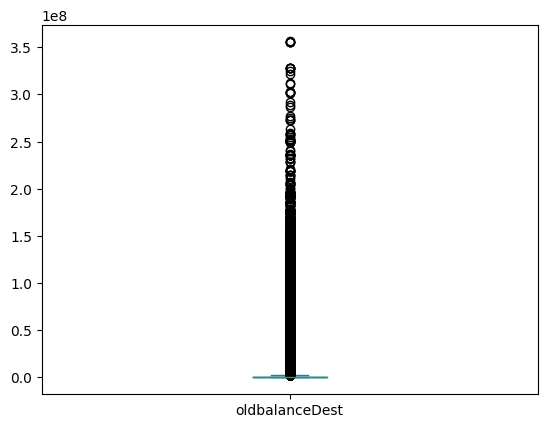

In [33]:
df['oldbalanceDest'].plot(kind='box')

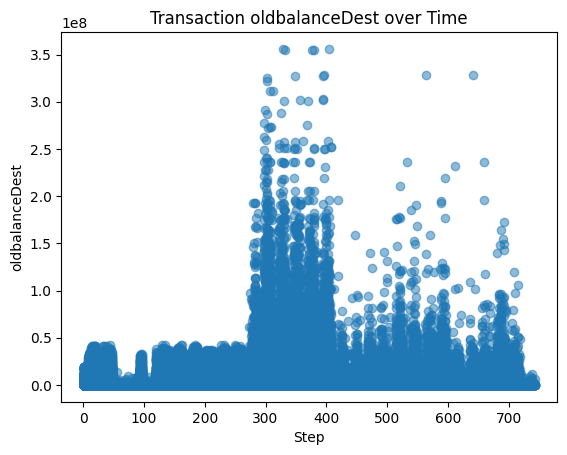

In [34]:
plt.scatter(df['step'], df['oldbalanceDest'], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('oldbalanceDest')
plt.title('Transaction oldbalanceDest over Time')
plt.show()


In [35]:
df['scaled_oldbalanceDest'] = rs.fit_transform(df[['oldbalanceDest']])

In [36]:
df['newbalanceDest'].describe()

count    6.362620e+06
mean     1.224996e+06
std      3.674129e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.146614e+05
75%      1.111909e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

<Axes: >

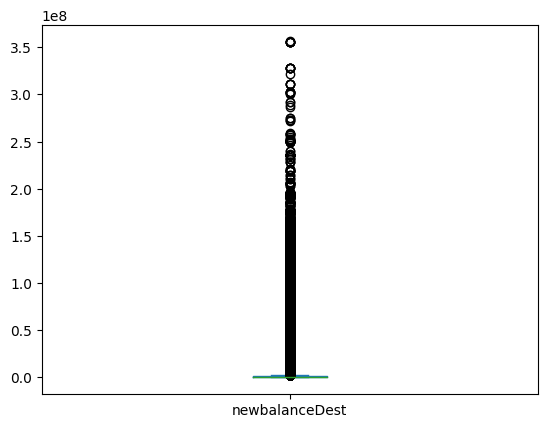

In [37]:
df['newbalanceDest'].plot(kind='box')

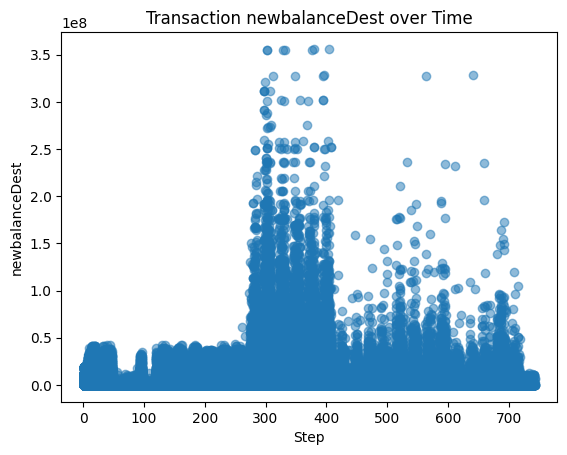

In [38]:
plt.scatter(df['step'], df['newbalanceDest'], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('newbalanceDest')
plt.title('Transaction newbalanceDest over Time')
plt.show()


In [39]:
df['scaled_newbalanceDest'] = rs.fit_transform(df[['newbalanceDest']])

In [40]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_scaled,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-0.332932,1.452991,1.111175,-0.140722,-0.193057
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-0.373762,0.065610,0.134375,-0.140722,-0.193057
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-0.382380,-0.130708,0.000000,-0.140722,-0.193057
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-0.382380,-0.130708,0.000000,-0.118260,-0.193057
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-0.323571,0.254820,0.207169,-0.140722,-0.193057


## Multi-collinearity in the data

In [41]:
corr_matrix = df.corr(numeric_only=True)

In [42]:
corr_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_scaled,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.022373,-0.010058,-0.010299,0.027665,0.025888
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.459304,0.042029,0.041837,0.976569,1.000000
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.076688,0.010154,-0.008148,-0.005885,0.000535
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.012295,0.003835,0.003776,-0.000513,-0.000529
amount_scaled,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,1.000000,-0.002762,-0.007861,0.294137,0.459304
scaled_oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.002762,1.000000,0.998803,0.066243,0.042029


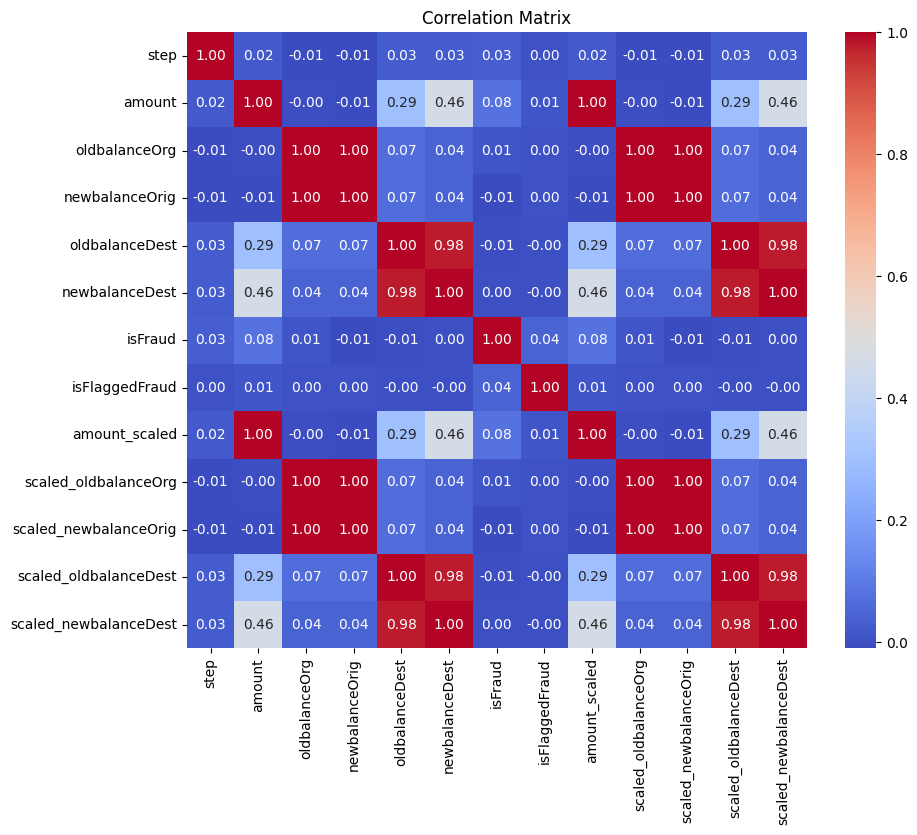

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Model Training Phase

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, precision_score, confusion_matrix,recall_score, f1_score
import time

In [45]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_scaled,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-0.332932,1.452991,1.111175,-0.140722,-0.193057
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-0.373762,0.065610,0.134375,-0.140722,-0.193057
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-0.382380,-0.130708,0.000000,-0.140722,-0.193057
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-0.382380,-0.130708,0.000000,-0.118260,-0.193057
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-0.323571,0.254820,0.207169,-0.140722,-0.193057


In [46]:
x = df.drop(columns=['isFraud','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud', 'nameOrig', 'nameDest'])
y = df['isFraud']

In [47]:
x.head()

,step,type,amount_scaled,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
0,1,PAYMENT,-0.332932,1.452991,1.111175,-0.140722,-0.193057
1,1,PAYMENT,-0.373762,0.065610,0.134375,-0.140722,-0.193057
2,1,TRANSFER,-0.382380,-0.130708,0.000000,-0.140722,-0.193057
3,1,CASH_OUT,-0.382380,-0.130708,0.000000,-0.118260,-0.193057
4,1,PAYMENT,-0.323571,0.254820,0.207169,-0.140722,-0.193057


In [48]:
categorical_cols = list(['type'])
numeric_cols = list(['step','amount_scaled',
                     'scaled_oldbalanceOrg','scaled_newbalanceOrig',
                     'scaled_oldbalanceDest','scaled_newbalanceDest'])

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [50]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
], remainder='drop')

In [51]:
ridge_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Ridge(alpha=1.0, solver='lsqr'))
])

In [52]:
ridge_model.fit(x_train, y_train)
ridge_preds = ridge_model.predict(x_test)

In [53]:
ridge_preds_= np.where(ridge_preds >= 0.5, 1, 0)

In [54]:
accuracy = accuracy_score(y_test,ridge_preds_)
print('accuracy: ',accuracy)

accuracy:  0.9988413578054324


In [55]:
cm = confusion_matrix(y_test,ridge_preds_)
print('Confusion matrix: ',cm)

Confusion matrix:  [[1588571       0]
 [   1843     241]]


In [56]:
precision = precision_score(y_test, ridge_preds_)
print("Precision:", precision)

Precision: 1.0


### In this case, the model overfits and is unable to predict the correct outcome.

## We should try more boosting algo's to figure out this problem.

In [57]:
def train_multiple_models(df):
    # Features & target
    x = df.drop(columns=['isFraud','amount','oldbalanceOrg','newbalanceOrig',
                         'oldbalanceDest','newbalanceDest','isFlaggedFraud',
                         'nameOrig','nameDest'])
    y = df['isFraud']
    
    categorical_cols = ['type']
    numeric_cols = ['step','amount_scaled','scaled_oldbalanceOrg',
                    'scaled_newbalanceOrig','scaled_oldbalanceDest',
                    'scaled_newbalanceDest']
    
    # Split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)
    
    # Preprocessor
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ], remainder='drop')
    
    # Models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000,n_jobs=-1),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_jobs=-1)
    }

    results = {}
    for name, model in models.items():
        start_time = time.time()
        pipe = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('model', model)
        ])
        pipe.fit(x_train, y_train)
        end_time = time.time()
        train_time = end_time-start_time
        y_pred = pipe.predict(x_test)
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1-Score': f1_score(y_test, y_pred, zero_division=0),
            'Train Time (sec)': round(train_time, 2)
        }

    return pd.DataFrame(results).T


In [58]:
df_sample = df.sample(frac=0.02, random_state=42)  # 2% data
print(train_multiple_models(df_sample))


                     Accuracy  Precision    Recall  F1-Score  Train Time (sec)
Logistic Regression  0.999057   1.000000  0.210526  0.347826              1.58
Decision Tree        0.999214   0.666667  0.684211  0.675325              0.68
Random Forest        0.999654   1.000000  0.710526  0.830769              9.45
Gradient Boosting    0.999183   0.676471  0.605263  0.638889             22.37
XGBoost              0.999686   1.000000  0.736842  0.848485              0.54


In [59]:
train_multiple_models(df)

,Accuracy,Precision,Recall,F1-Score,Train Time (sec)
Logistic Regression,0.999228,0.933198,0.442418,0.600260,33.67
Decision Tree,0.999676,0.878072,0.874280,0.876172,50.40
Random Forest,0.999720,0.985774,0.797985,0.881994,1106.94
Gradient Boosting,0.998890,0.802281,0.202495,0.323372,1669.59
XGBoost,0.999780,0.956797,0.871401,0.912104,26.69
